In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [35]:
df = pd.read_csv(r"C:\Users\Babu\Documents\Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['urban']= label_encoder.fit_transform(df['Urban']) 

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,urban
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1


In [8]:
x=df.iloc[:,0:4]
y=df['Urban']

In [9]:
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
...,...,...,...,...
395,12.57,138,108,17
396,6.14,139,23,3
397,7.41,162,26,12
398,5.94,100,79,7


In [10]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
395    Yes
396     No
397    Yes
398    Yes
399    Yes
Name: Urban, Length: 400, dtype: object

In [11]:
df['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'urban']

In [14]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [15]:
y_train

140    Yes
166    Yes
34     Yes
269    Yes
225    Yes
      ... 
381    Yes
282    Yes
61      No
6      Yes
272    Yes
Name: Urban, Length: 320, dtype: object

### Building Decision Tree Classifier using Entropy Criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

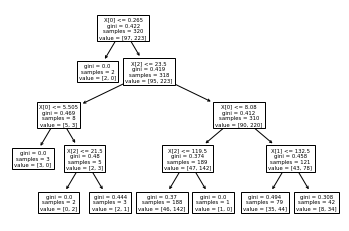

In [17]:
#PLot the decision tree
tree.plot_tree(model);


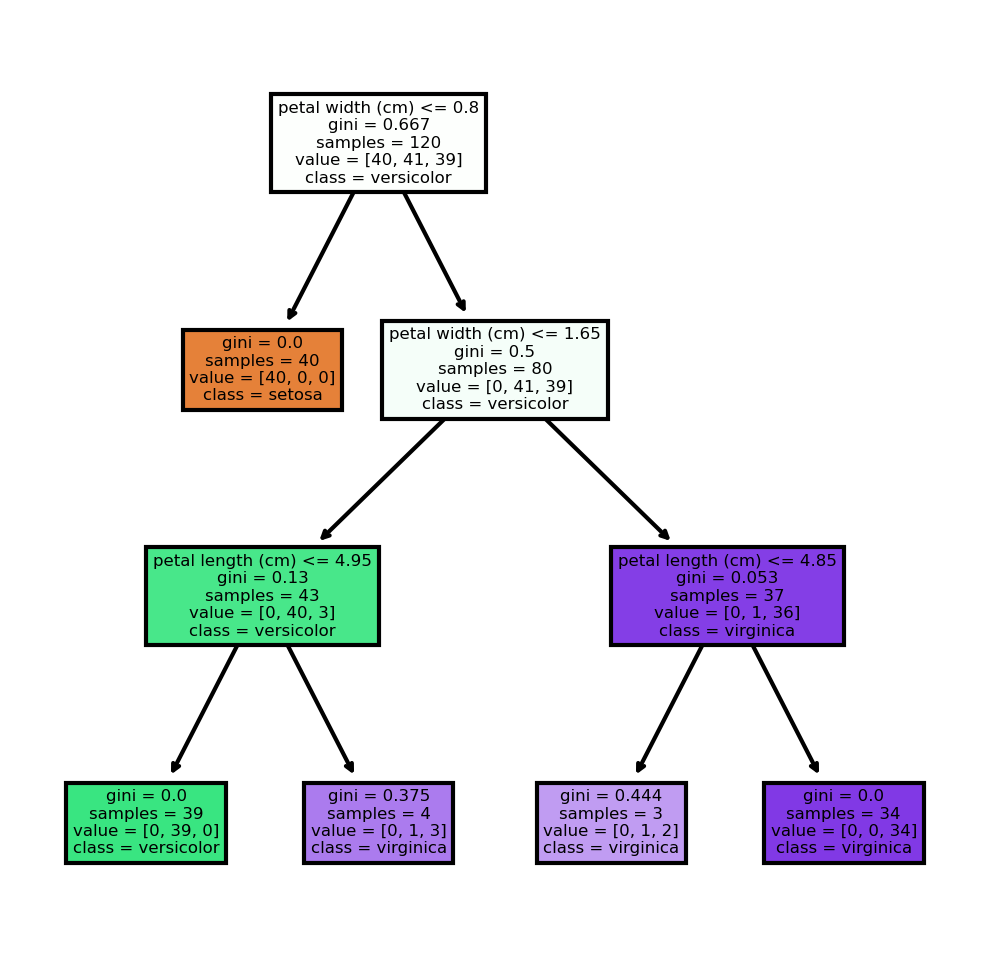

In [24]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Yes    78
No      2
dtype: int64

In [19]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.7625

### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [21]:
y_train

140    Yes
166    Yes
34     Yes
269    Yes
225    Yes
      ... 
381    Yes
282    Yes
61      No
6      Yes
272    Yes
Name: Urban, Length: 320, dtype: object

In [22]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.7625

# Decision Tree Regression Example

In [24]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [25]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,urban
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1


In [26]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=1)

In [28]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [29]:
#Find the mse
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(y_test,pred)

53.32216068781533

In [30]:
metrics.mean_absolute_percentage_error(y_test,pred)

1.3333288056733292e+16

In [31]:
np.mean(np.abs(y_test-pred)/np.array(y_test))

ZeroDivisionError: float division by zero

[Text(0.5, 0.875, 'X[0] <= 9.19\nsquared_error = 43.261\nsamples = 268\nvalue = 6.993'),
 Text(0.25, 0.625, 'X[0] <= 5.265\nsquared_error = 38.035\nsamples = 193\nvalue = 5.585'),
 Text(0.125, 0.375, 'X[0] <= 4.54\nsquared_error = 25.344\nsamples = 64\nvalue = 4.0'),
 Text(0.0625, 0.125, 'squared_error = 29.976\nsamples = 38\nvalue = 5.395'),
 Text(0.1875, 0.125, 'squared_error = 11.575\nsamples = 26\nvalue = 1.962'),
 Text(0.375, 0.375, 'X[1] <= 131.5\nsquared_error = 42.466\nsamples = 129\nvalue = 6.372'),
 Text(0.3125, 0.125, 'squared_error = 47.915\nsamples = 85\nvalue = 7.224'),
 Text(0.4375, 0.125, 'squared_error = 27.835\nsamples = 44\nvalue = 4.727'),
 Text(0.75, 0.625, 'X[2] <= 99.0\nsquared_error = 38.504\nsamples = 75\nvalue = 10.613'),
 Text(0.625, 0.375, 'X[1] <= 152.0\nsquared_error = 37.148\nsamples = 60\nvalue = 9.45'),
 Text(0.5625, 0.125, 'squared_error = 34.782\nsamples = 57\nvalue = 9.912'),
 Text(0.6875, 0.125, 'squared_error = 0.889\nsamples = 3\nvalue = 0.667'),


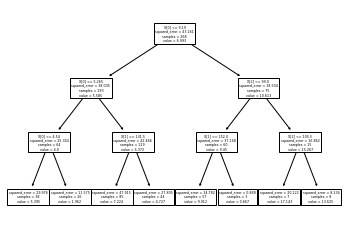

In [32]:
tree.plot_tree(model)

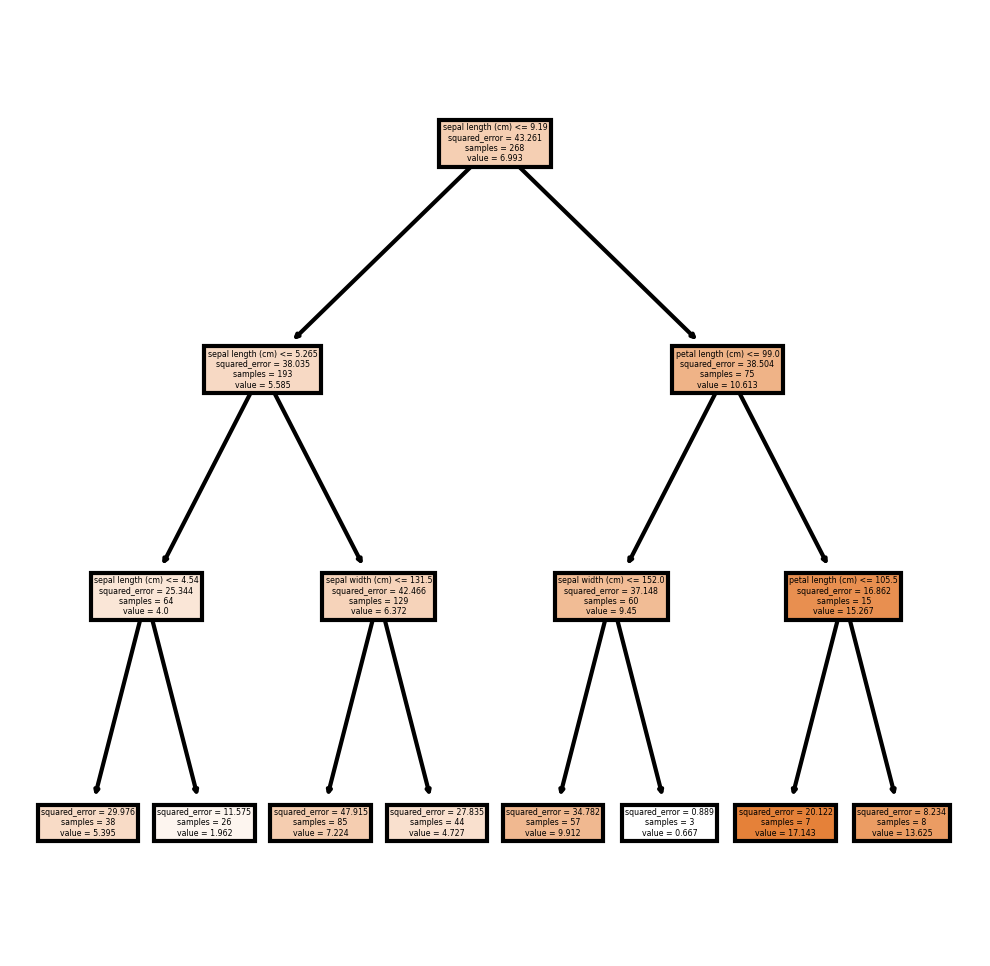

In [33]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)']
cn=['petal width (cm)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);